# Ejercicio: Diamonds Dataset

* El ejercicio puntua un Máximo de 10 puntos.
* Lea el ejercicio detenidamente y realice cada uno de los apartados.
* En caso de duda puede consultar internet para su realización.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer , scale

1) Realizar el Data Mining del set de datos, representando los distintos datos, si existe si o no correlación, etc.

    Añadir conclusiones observadas de los datos (2 ptos)

In [2]:
df = pd.read_csv("diamonds.csv",index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Presentacion del Dataset Diamonds

Este conjunto de datos clásico, contiene los precios y otros atributos de casi 53920 diamantes. Se han reducido las columnas a 8 quedando de esta manera:

1.price : precio en dolares americanos ( 326− 18 823 )

2.carat : peso del diamante (0,2 - 5,01)

3.cut : calidad del corte ( Regular , Buena , Muy Buena , Premium , Ideal )

4.color : color diamante, de J (peor) a D (mejor)

5.clarity : una medida de la claridad del diamante (I1 (peor) ,SI2 ,SI1 ,VS2 ,VS1 ,VVS2 ,VVS1 ,IF (mejor))

Volume que esta formada por x,y,z.(Largo, Ancho y Profundo del diamante).
x : longitud en mm ( 0 - 10,74 )

y : ancho en mm ( 0 - 58.9 )

z : profundidad en mm ( 0 - 31,8 )

7.deph : porcentaje de profundidad total = z / media( x, y ) = 2 * z / ( x + y ) --> ( 43 - 79 )

8.table : ancho de la parte superior del diamante en relación con el punto más ancho (43 - 95)

# 1.Data Mining

Primero crearemos una columna de "Volumen" con los valores de las columnas x,y,z. Así podré trabajar mejor los datos.

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Datos estadisticos del Dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [6]:
#Filas y columnas de los datos.
df.shape

(53940, 10)

El Dataset Diamonds tiene 53920 filas y 8 columnas ,ya que las columnas x,y,z las he unificado
en la columna volumen.

# CORRELACIÓN

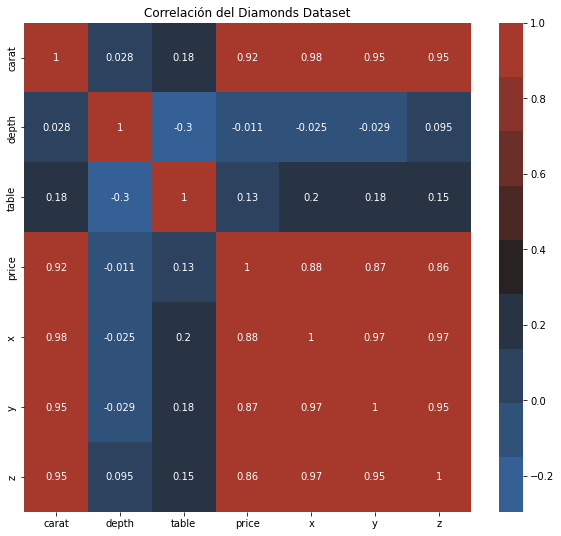

In [7]:
plt.figure(figsize=(10, 9))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark"), annot=True)
plt.title("Correlación del Diamonds Dataset")
plt.show()

Vemos que existe más correlación entre carat-volume, carat-price, price-volume

# PLOT PRICE/CARAT

Precio más alto del diamante en Diamonds Dataset:  18823


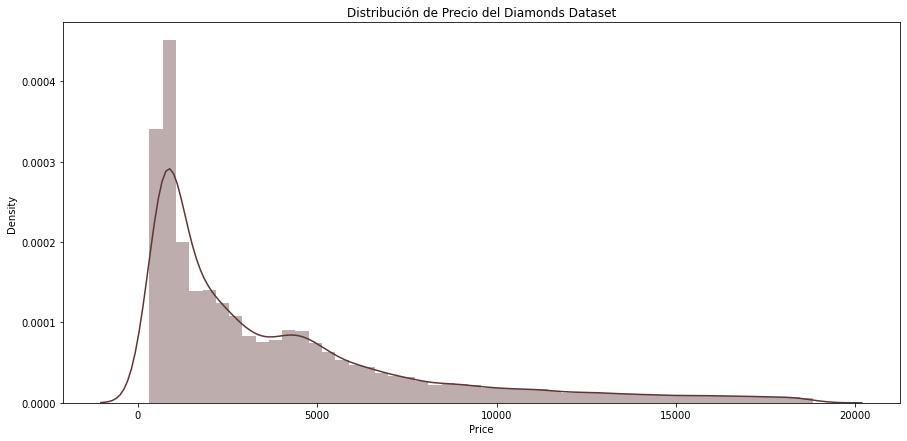

In [8]:
plt.figure(figsize=(15, 7))
sns.distplot(df["price"], color="#5E3434")
plt.xlabel("Price")
plt.title("Distribución de Precio del Diamonds Dataset")
print("Precio más alto del diamante en Diamonds Dataset: ", df["price"].max())
plt.show()

Carat más alto del diamante en Diamonds Dataset:  5.01


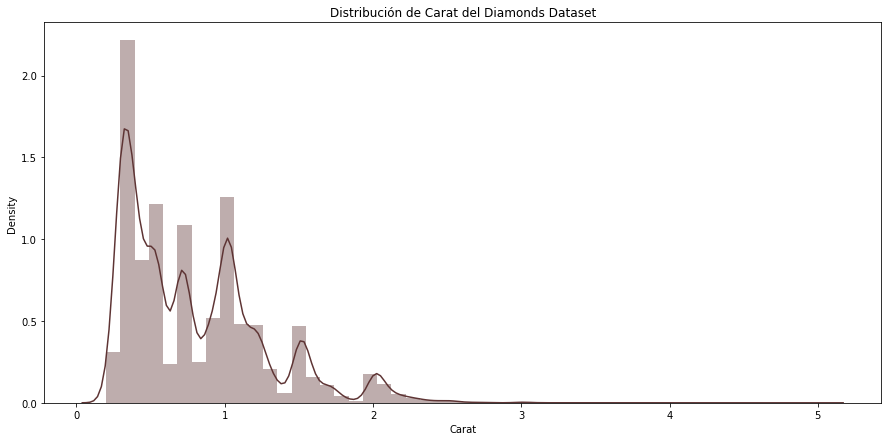

In [9]:
plt.figure(figsize=(15, 7))
sns.distplot(df["carat"], color="#5E3434")
plt.xlabel("Carat")
plt.title("Distribución de Carat del Diamonds Dataset")
print("Carat más alto del diamante en Diamonds Dataset: ", df["carat"].max())
plt.show()

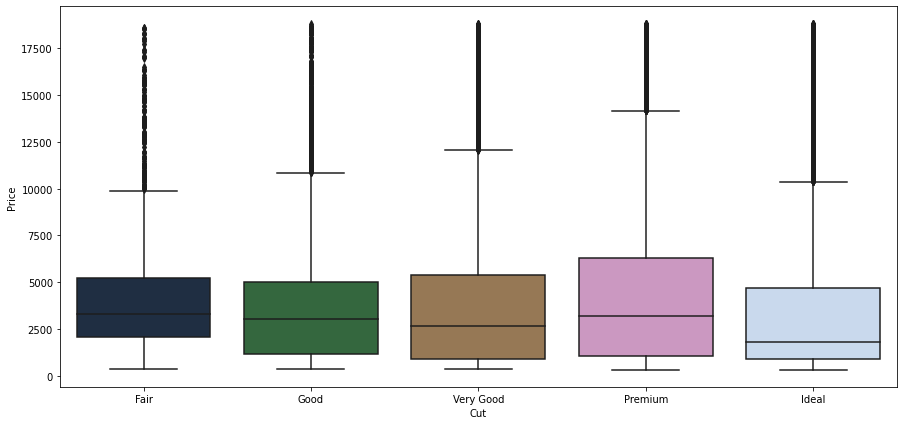

In [10]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="cut", y="price", data=df, palette=sns.color_palette("cubehelix", 5),
order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

Se observa que todos los Outliers se presentan en valores máximos y
el número de observaciones es mayor en ideal.

# PLOT CUT/PRICE

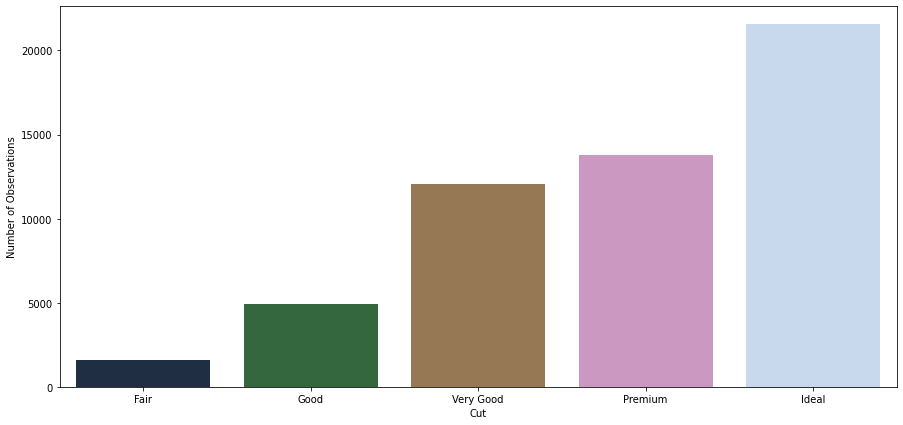

In [11]:
#Distribución por Corte y Numero de observaciones.
plt.figure(figsize= (15, 7))
sns.countplot(x= "cut", data= df, palette= sns.color_palette("cubehelix", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Number of Observations")
plt.show()

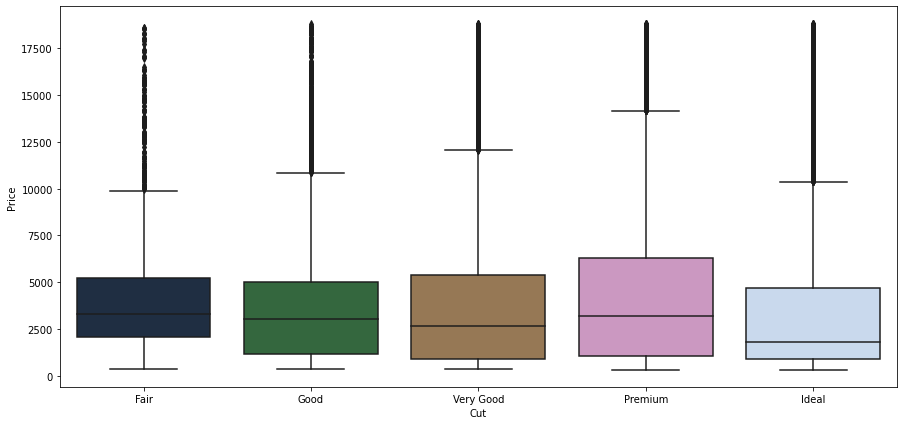

In [12]:
#Distribución corte, precio
plt.figure(figsize= (15, 7))
sns.boxplot(x= "cut", y= "price", data= df, palette= sns.color_palette("cubehelix", 5),
            order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# PLOT CLARITY/PRICE

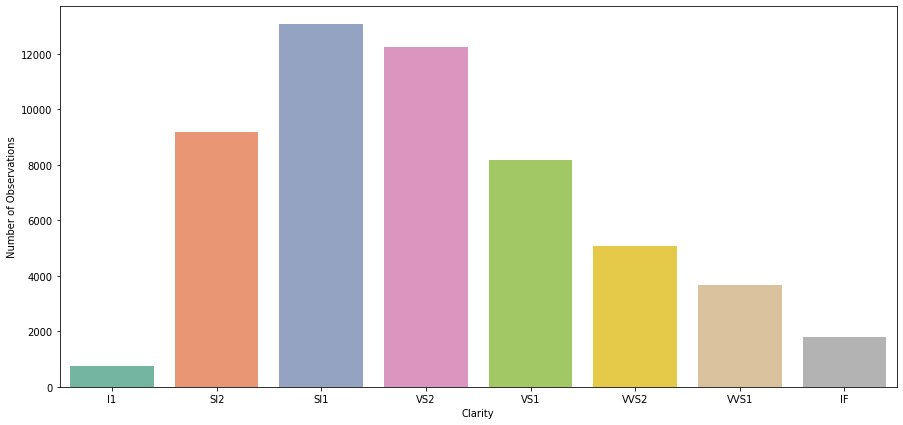

In [13]:
#Ditribución claridad, observaciones.
plt.figure(figsize= (15, 7))
sns.countplot(x= "clarity", data= df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Number of Observations")
plt.show()

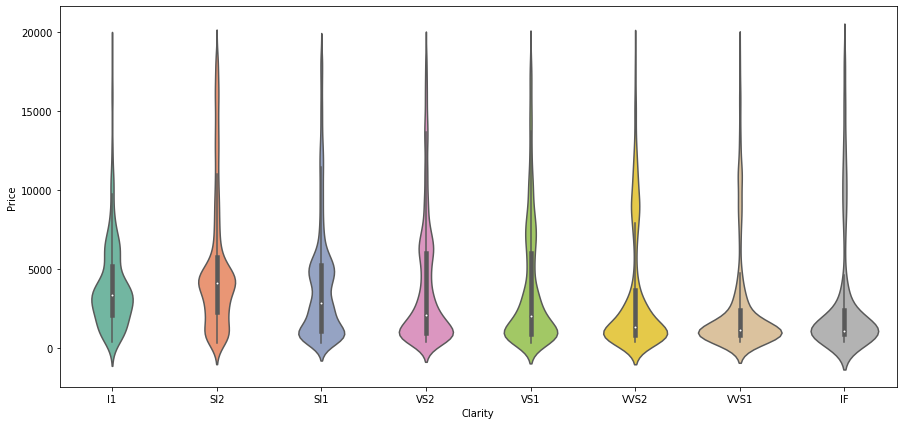

In [14]:
plt.figure(figsize= (15, 7))
sns.violinplot(x= "clarity", y= "price", data= df,
            order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

# PLOT COLOR /PRICE

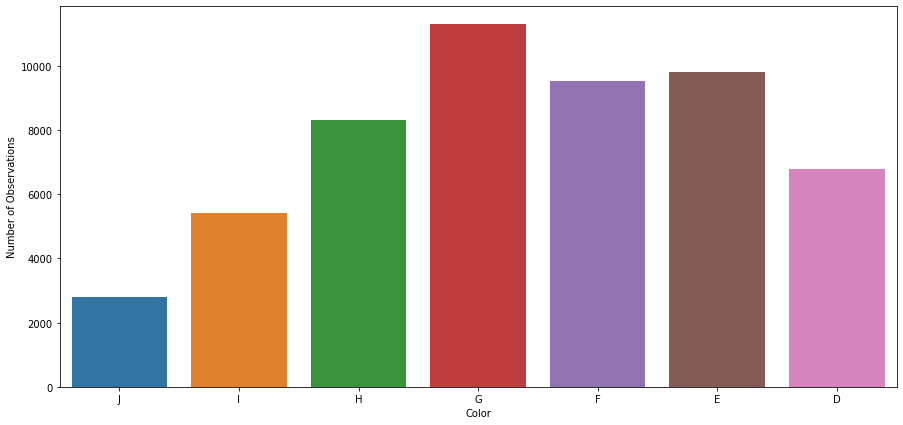

In [15]:
#Distribucion color observaciones
plt.figure(figsize= (15, 7))
sns.countplot(x= "color", data= df, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Number of Observations")
plt.show()

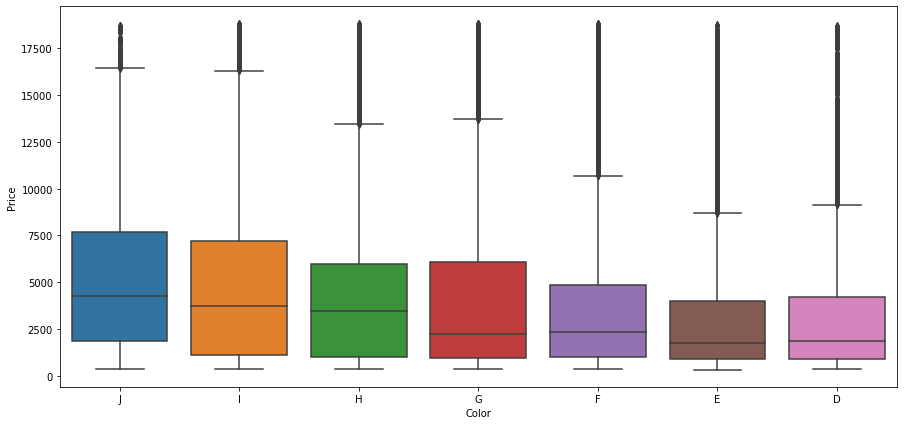

In [16]:
#distribucion color, precio
plt.figure(figsize= (15, 7))
sns.boxplot(x= "color", y= "price", data= df, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

# CONCLUSIONES

1.La profundidad está inversamente relacionada con el precio.

2.El precio del diamante esta altamente relacionado con el quilate y sus
  dimensiones. Esto se debe a que si el porcentaje de profundidad de un diamante es demasiado grande o pequeño, el diamante se volverá 'oscuro' en apariencia porque ya no devolverá una cantidad atractiva de luz.
  
3.Los quilates del diamante son lo que más influye en su precio, cuanto mas grande es la
  piedra mayor es el precio, un diamante de 2 quilates será más 'caro' que el costo total de dos diamantes de 1 quilate de la 
  misma calidad.
  
4. El precio más alto del diamante en Diamonds Dataset:  18823$.
 
5. El diamante que mas quilates tiene en Diamonds Dataset es de  5.01q.


# 2.FEATURE ENGINEERING

#VEMOS SI HAY VALORES NULOS

In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [18]:
#TRANSFORMAMOS COLUMNAS CON VARIABLES CATEGORICAS EN VARIABLES NUMERICAS.

In [19]:
df['cut'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})
df['color'] = df['color'].map({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7})
df['clarity'] = df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [20]:
df.head(100)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
96,0.70,2,6,4,57.5,58.0,2759,5.85,5.90,3.38
97,0.70,2,5,5,59.4,62.0,2759,5.71,5.76,3.40
98,0.96,1,5,2,66.3,62.0,2759,6.27,5.95,4.07
99,0.73,3,6,3,61.6,59.0,2760,5.77,5.78,3.56


# 3.ENTRENAMIENTO

In [21]:
X = df.drop(['price'], axis=1)
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [23]:
#ESCALAMOS LOS DATOS.

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4.EXACTITUD DEL MODELO

# Lineal Regresión Multiple

In [85]:
lr_multiple = linear_model.LinearRegression()

In [86]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = lr_multiple.predict(X_test)
y_pred

array([4484.17842205, 5029.93744924,  176.84862163, ..., 1254.51569334,
       5217.30087903, 3294.03690117])

In [88]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [89]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[5101.93452838  132.39460393  554.29796344  824.85546777 -102.32299859
  -64.33257993 -848.78734263   65.78517422 -179.02540091]
Valor de la intersección o coeficiente "b":
3937.0886865035222


In [90]:
print("Precisión del modelo:")
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.9071679845956869


# Support Vector Machine (SVM)

In [91]:
from sklearn.svm import SVR

In [92]:
svr = SVR(kernel="linear", C=1.0, epsilon=0.2)

In [93]:
svr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [94]:
y_pred = svr.predict(X_test)
y_pred

array([4387.51456757, 4780.38917741,  292.67712252, ...,  978.31249611,
       5449.04077553, 2707.46464953])

In [95]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [96]:
print("DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN")
print()
print("Precisión del modelo:")
print(svr.score(X_train, y_train))

DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo:
0.8643914453956687


# Decission Tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth=5)

In [98]:
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [99]:
y_pred = adr.predict(X_test)
y_pred

array([4360.96543408, 4606.70678796,  659.85733696, ...,  659.85733696,
       5968.08367072, 1708.66157372])

In [100]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [101]:
print("Datos del Modelo de árboles de decision Regresión")
print()
print("Precisión del modelo:")
print(adr.score(X_train, y_train))

Datos del Modelo de árboles de decision Regresión

Precisión del modelo:
0.9393057626764753


# Regresión Líneal Polinomial

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [103]:
poli_reg = PolynomialFeatures(degree= 2)

In [104]:
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [105]:
pr = linear_model.LinearRegression()

In [106]:
pr.fit(X_train_poli, y_train)

LinearRegression()

In [107]:
y_pred = pr.predict(X_test_poli)
y_pred

array([3982.79946814, 4471.34082229,  648.34105644, ...,  793.55377916,
       4231.92075095, 2604.41153694])

In [108]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [109]:
print("Precisión del modelo: ")
print(pr.score(X_train_poli, y_train))

Precisión del modelo: 
0.9641845720290443


# Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor
bar = RandomForestRegressor(n_estimators=300, max_depth=8)

In [111]:
bar.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=300)

In [112]:
y_pred = bar.predict(X_test)
y_pred

array([4332.37061775, 4222.48523718,  621.11475868, ...,  743.42705169,
       5360.70132951, 1920.97696896])

In [113]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [114]:
print("Datos del modelo Bosques Aleatorios Regresión")
print()
print("precisión del modelo:")
print(bar.score(X_train, y_train))

Datos del modelo Bosques Aleatorios Regresión

precisión del modelo:
0.9777325673451588


# Random Forest Regression NOS DA LA MAYOR PRECISIÓN == 97.77

# 5.SI TENEMOS UN DIAMANTE CON LAS SIGUIENTES MEDICIONES, QUE PRECIO TENDRIA....

In [115]:
prueba = [[1.2, 6.0, 6.0, 4.0, 58.0, 90.1, 3.90, 3.94, 2.50]]

In [116]:
resultado_prueba = bar.predict(prueba)
resultado_prueba

array([15245.3467154])

# EL PRECIO SERIA DE == 15595.6 $$$

In [ ]:
#ESCALAMOS LOS DATOS.

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
lr_multiple = linear_model.LinearRegression()

In [119]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = lr_multiple.predict(X_test)
y_pred

array([4484.17842205, 5029.93744924,  176.84862163, ..., 1254.51569334,
       5217.30087903, 3294.03690117])

In [121]:
y_test

8521     4426
10260    4751
31527     765
20347    8743
29225     695
         ... 
6204     3998
11646    5053
35130     888
11356    4992
51735    2401
Name: price, Length: 10788, dtype: int64

In [122]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[5101.93452838  132.39460393  554.29796344  824.85546777 -102.32299859
  -64.33257993 -848.78734263   65.78517422 -179.02540091]
Valor de la intersección o coeficiente "b":
3937.0886865035222


In [123]:
print("Precisión del modelo:")
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.9071679845956869
